In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [184]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split as tts,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [185]:
df=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\gapminder(1).csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [186]:
df.dtypes

population         float64
fertility          float64
HIV                float64
CO2                float64
BMI_male           float64
GDP                float64
BMI_female         float64
life               float64
child_mortality    float64
Region              object
dtype: object

In [187]:
df.isnull().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

In [188]:
X=df.drop(['Region'],1)
y=df["Region"]

In [189]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=42)

### Decision Tree Classifier (Gini)

In [190]:
ddc=DecisionTreeClassifier(random_state=42)

In [191]:
ddc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [192]:
y_pred=ddc.predict(X_test)

In [193]:
accuracy_score(y_test,y_pred)

0.7142857142857143

In [194]:
print(classification_report(y_test,y_pred))

                            precision    recall  f1-score   support

                   America       0.80      1.00      0.89         4
       East Asia & Pacific       0.33      0.50      0.40         2
     Europe & Central Asia       0.69      0.73      0.71        15
Middle East & North Africa       0.00      0.00      0.00         6
                South Asia       1.00      1.00      1.00         1
        Sub-Saharan Africa       1.00      0.93      0.96        14

                  accuracy                           0.71        42
                 macro avg       0.64      0.69      0.66        42
              weighted avg       0.69      0.71      0.70        42



In [195]:
ranking=list(ddc.feature_importances_)
features=list(X)
coef=pd.Series(ranking, index=features)

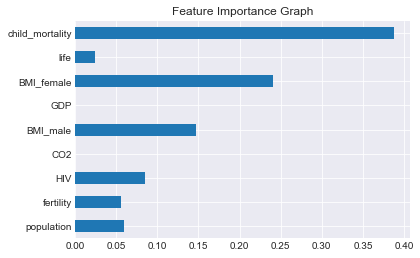

In [196]:
coef.plot(kind='barh')
plt.title("Feature Importance Graph")
plt.show()

### Decision Tree Classifier (Entropy)

In [197]:
ddc_1=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [198]:
ddc_1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [199]:
y_pred=ddc_1.predict(X_test)

In [200]:
accuracy_score(y_test,y_pred)

0.7857142857142857

In [201]:
print(classification_report(y_test,y_pred))

                            precision    recall  f1-score   support

                   America       0.67      1.00      0.80         4
       East Asia & Pacific       0.50      0.50      0.50         2
     Europe & Central Asia       0.68      0.87      0.76        15
Middle East & North Africa       1.00      0.17      0.29         6
                South Asia       1.00      1.00      1.00         1
        Sub-Saharan Africa       1.00      0.93      0.96        14

                  accuracy                           0.79        42
                 macro avg       0.81      0.74      0.72        42
              weighted avg       0.83      0.79      0.76        42



In [202]:
ranking=list(ddc_1.feature_importances_)
features=list(X)
coef=pd.Series(ranking, index=features)

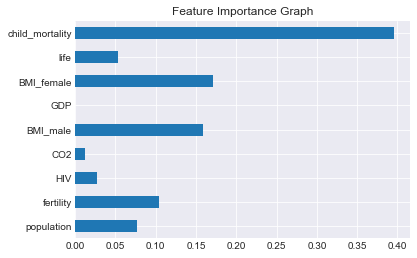

In [203]:
coef.plot(kind='barh')
plt.title("Feature Importance Graph")
plt.show()

In [204]:
df=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Practice Datasets\\Consumo_cerveja.csv")
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [205]:
columns=["Date","Median","Minimum","Maximum","ppt","Weekend","y"]

In [206]:
df.columns=columns

In [207]:
df["Median"]=df["Median"].str.replace(",",".").astype('float')

In [208]:
df["Minimum"]=df["Minimum"].str.replace(",",".").astype('float')

In [209]:
df["Maximum"]=df["Maximum"].str.replace(",",".").astype('float')

In [210]:
df["ppt"]=df["ppt"].str.replace(",",".").astype('float')

In [211]:
df=df.drop(["Date"],1)

In [212]:
df=df.dropna()

In [213]:
df["Weekend"]=df["Weekend"].astype('category')

In [214]:
df.dtypes

Median      float64
Minimum     float64
Maximum     float64
ppt         float64
Weekend    category
y           float64
dtype: object

In [215]:
df.head()

,Median,Minimum,Maximum,ppt,Weekend,y
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900


In [216]:
X=df.drop(["y"],1)
y=df["y"]

### Decision Tree Regressor (using GridSearchCV)

In [217]:
dtr=DecisionTreeRegressor(random_state=42)

In [218]:
dtr

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [219]:
parameters={"criterion":["mse","mae"],
           "max_depth":np.arange(2,5,1),
           "max_features":np.arange(2,5,1),
           "min_samples_split":np.arange(0.1,0.4,0.01)}

In [220]:
dtr_cv=GridSearchCV(estimator=dtr,param_grid=parameters,cv=5)

In [221]:
dtr_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=42,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([2, 3, 4]),
                         'max_features': array([2, 3, 4]),
                         'min_samples_split':

In [222]:
dtr_cv.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 4,
 'min_samples_split': 0.1}

In [223]:
dtr_cv.best_score_

0.566388838119954

In [224]:
dtr_cv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=4,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.1, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [225]:
dtr_cv.best_estimator_.feature_importances_

array([0.        , 0.00753331, 0.62700453, 0.01464305, 0.35081911])

In [227]:
ranking=list(dtr_cv.best_estimator_.feature_importances_)
features=list(X)
coef=pd.Series(ranking, index=features)

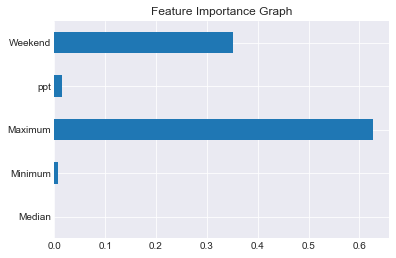

In [228]:
coef.plot(kind='barh')
plt.title("Feature Importance Graph")
plt.show()